In [1]:
# import necessary libraries
library(glmnet)
library(doParallel)
# accelerate using parallel computing
registerDoParallel(makeCluster(detectCores()))

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Loading required package: iterators
Loading required package: parallel


In [7]:
# INPUT: read blog data (train & test)
trainData <- read.csv('BlogFeedback/blogData_train.csv')
X <- as.matrix(trainData[, -c(281)])
Y <- as.matrix(trainData[, 281])
# combine test data using "cat *.csv > all_test.csv" in terminal
# Reference: Piazza post No. 603
testData <- read.csv('BlogFeedback/all_test.csv')
testX <- as.matrix(testData[, -c(281)])
testY <- as.matrix(testData[, 281])

In [8]:
# train a generalized linear poisson model
fit <- cv.glmnet(X, Y, family = "poisson")

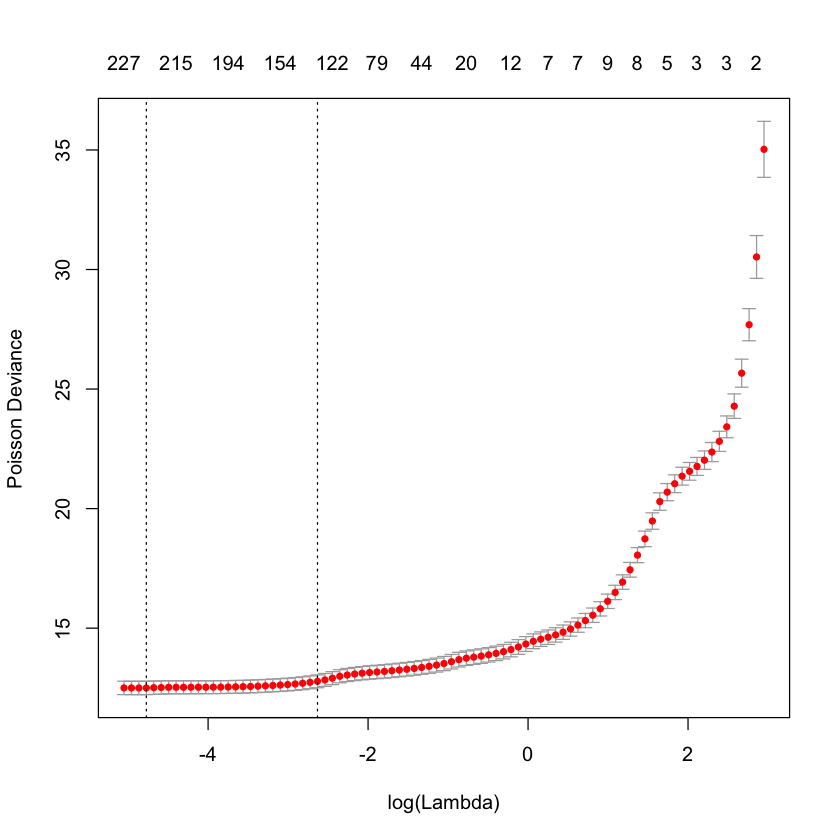

In [9]:
# a plot of the cross-validated deviance of the model
plot(fit)

In [41]:
# predict on the training set (predict() from glmnet)
trainPred = predict(fit, newx = X, s = fit$lambda.min, type = "response")

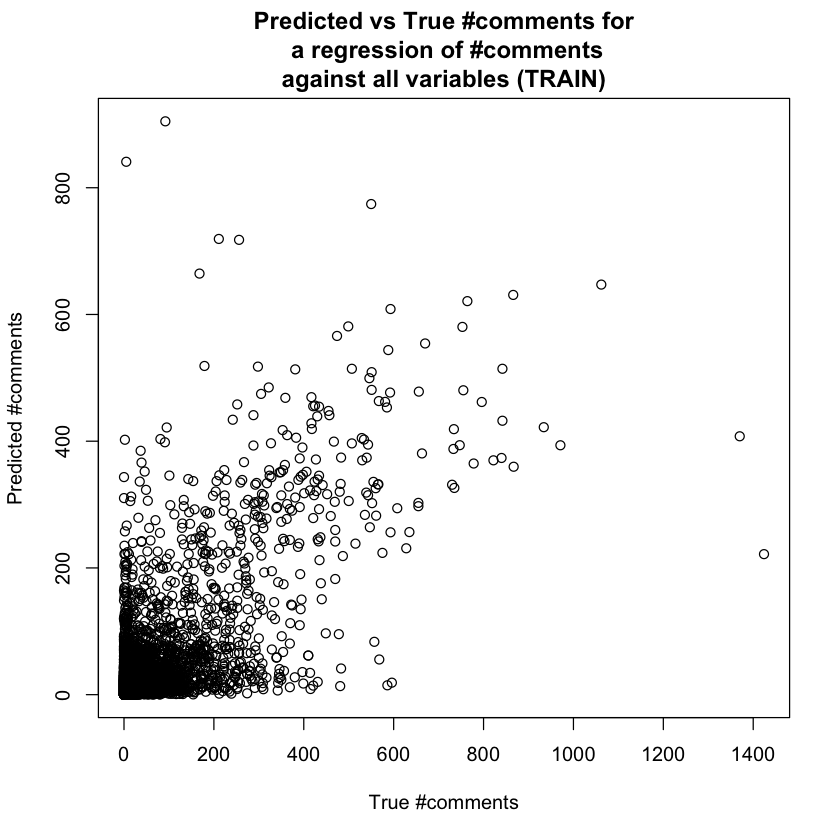

In [42]:
# a scatter plot of true values vs predicted values for the training set
plot(Y, trainPred,
xlab = "True #comments", ylab = "Predicted #comments",
main = "Predicted vs True #comments for\n a regression of #comments
against all variables (TRAIN)")

In [43]:
# predict on the test set (predict() from glmnet)
testPred = predict(fit, newx = testX, s = fit$lambda.min, type = "response")

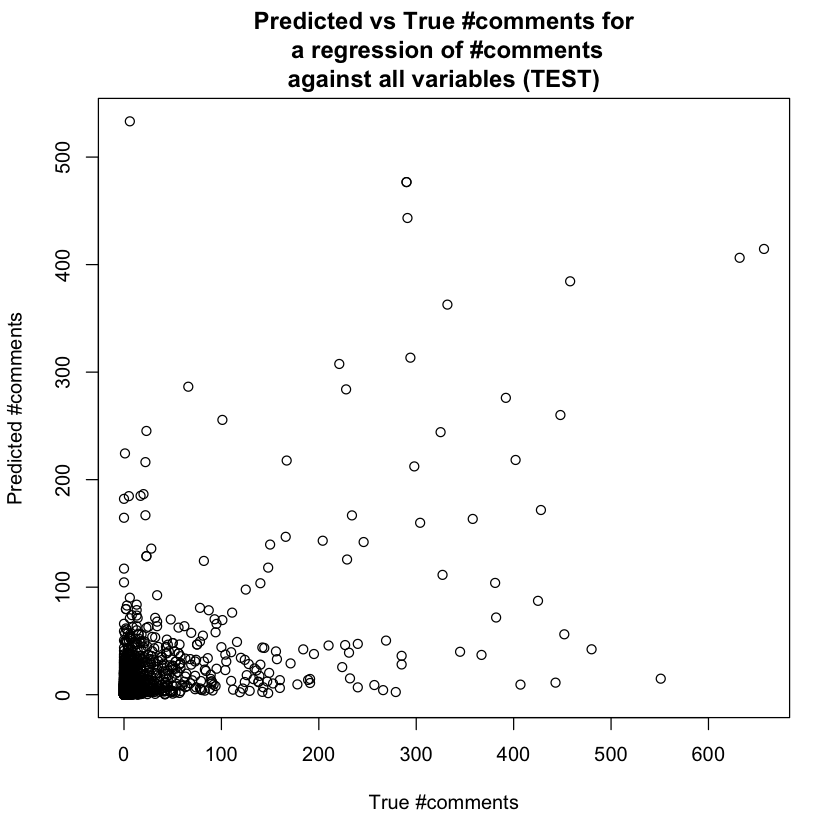

In [44]:
# a scatter plot of true values vs predicted values for the test set
plot(testY, testPred,
xlab = "True #comments", ylab = "Predicted #comments",
main = "Predicted vs True #comments for\n a regression of #comments
against all variables (TEST)")

In [47]:
Y

0
0
1
27
0
0
27
9
9
0
0
